In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("input/lionel_messi_goals.csv")
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [4]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


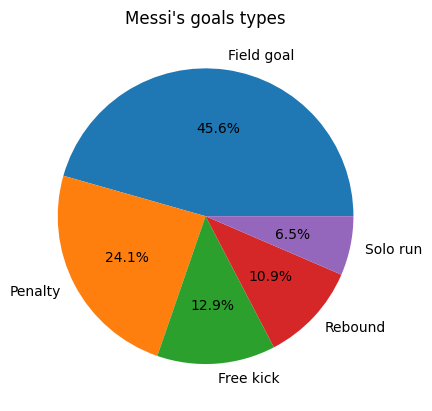

In [5]:
plt.pie(df["count"], labels=df["Goal Type"], autopct='%1.1f%%')
plt.title("Messi's goals types")
plt.show()

In [6]:
df = data["Goal Method"].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


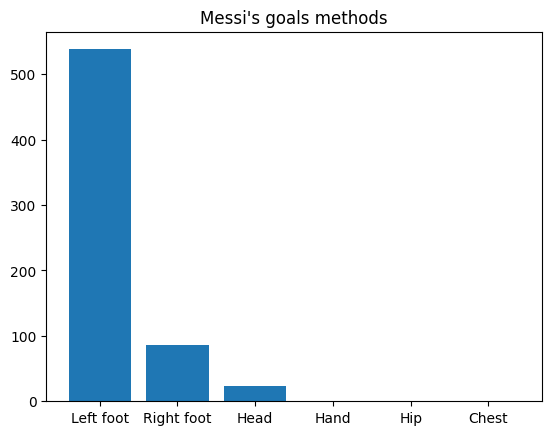

In [7]:
plt.bar(df["Goal Method"], df["count"])
plt.title("Messi's goals methods")
plt.show()

In [8]:
data["Minute"] = data["Minute"].apply(eval)
data["Minute"] = data["Minute"].astype(int)
df = data["Minute"].value_counts().reset_index().sort_values(by=["Minute"], ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


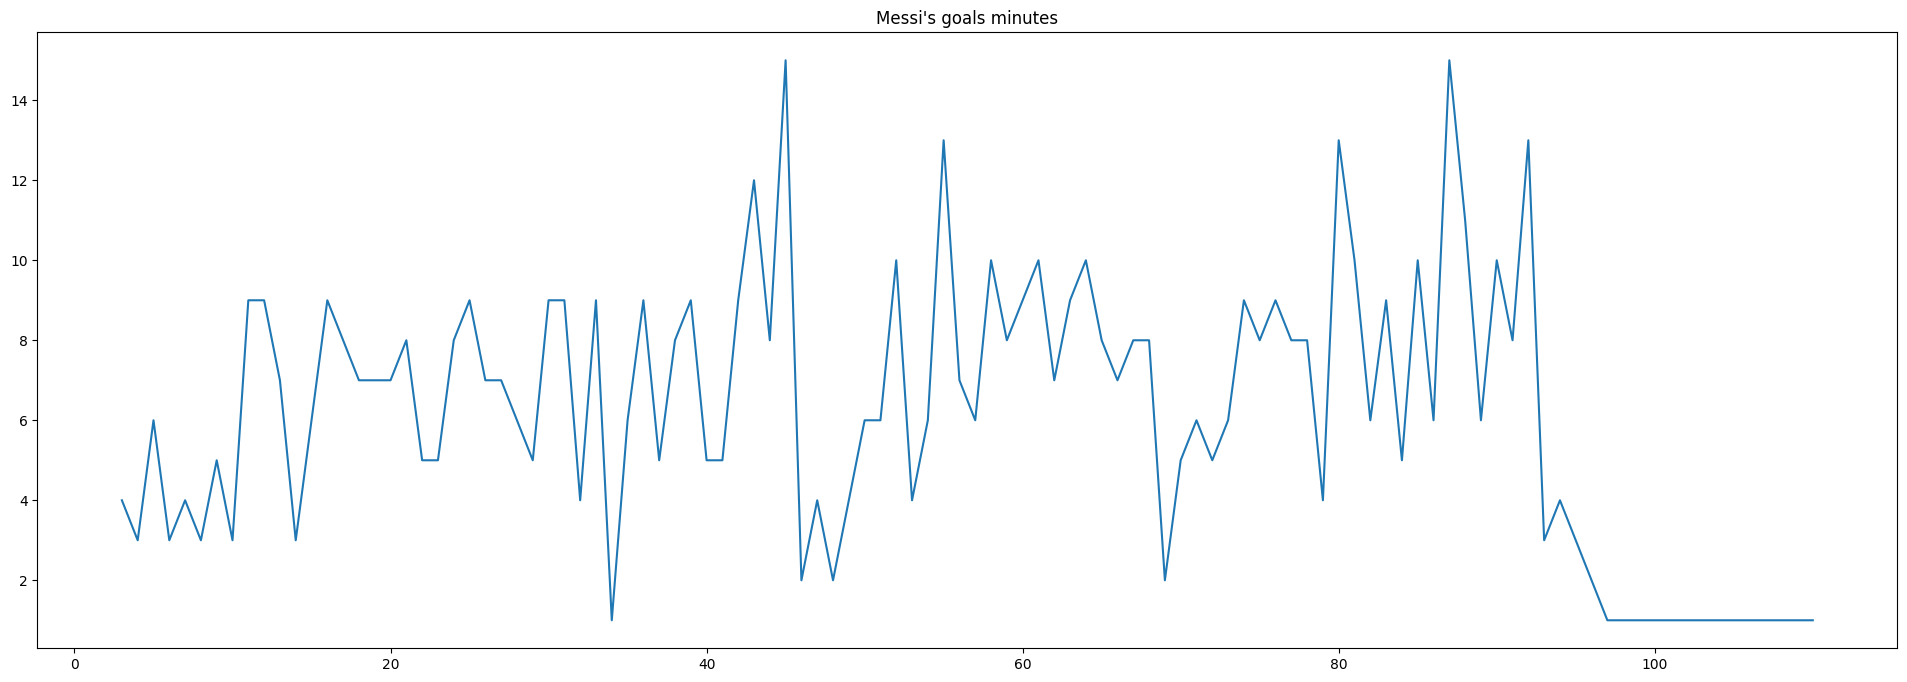

In [9]:
plt.figure(figsize=(24, 8))
plt.plot(df["Minute"], df["count"])
plt.title("Messi's goals minutes")
plt.show()

In [10]:
clean_data = data
clean_data['Date'] = clean_data['Date'].to_numpy(str)

date_list = []
for date in clean_data['Date'] :
    date_list.append(date[-4:])

clean_data['Date'] = date_list

clean_data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [11]:
df = clean_data.value_counts(['Date']).reset_index()
df = df.sort_values(by= 'Date' , ascending=True).reset_index()
df

,index,Date,count
0,14,2005,3
1,13,2006,12
2,10,2007,31
3,11,2008,22
4,9,2009,41
5,1,2010,60
6,2,2011,59
7,0,2012,91
8,8,2013,45
9,4,2014,58


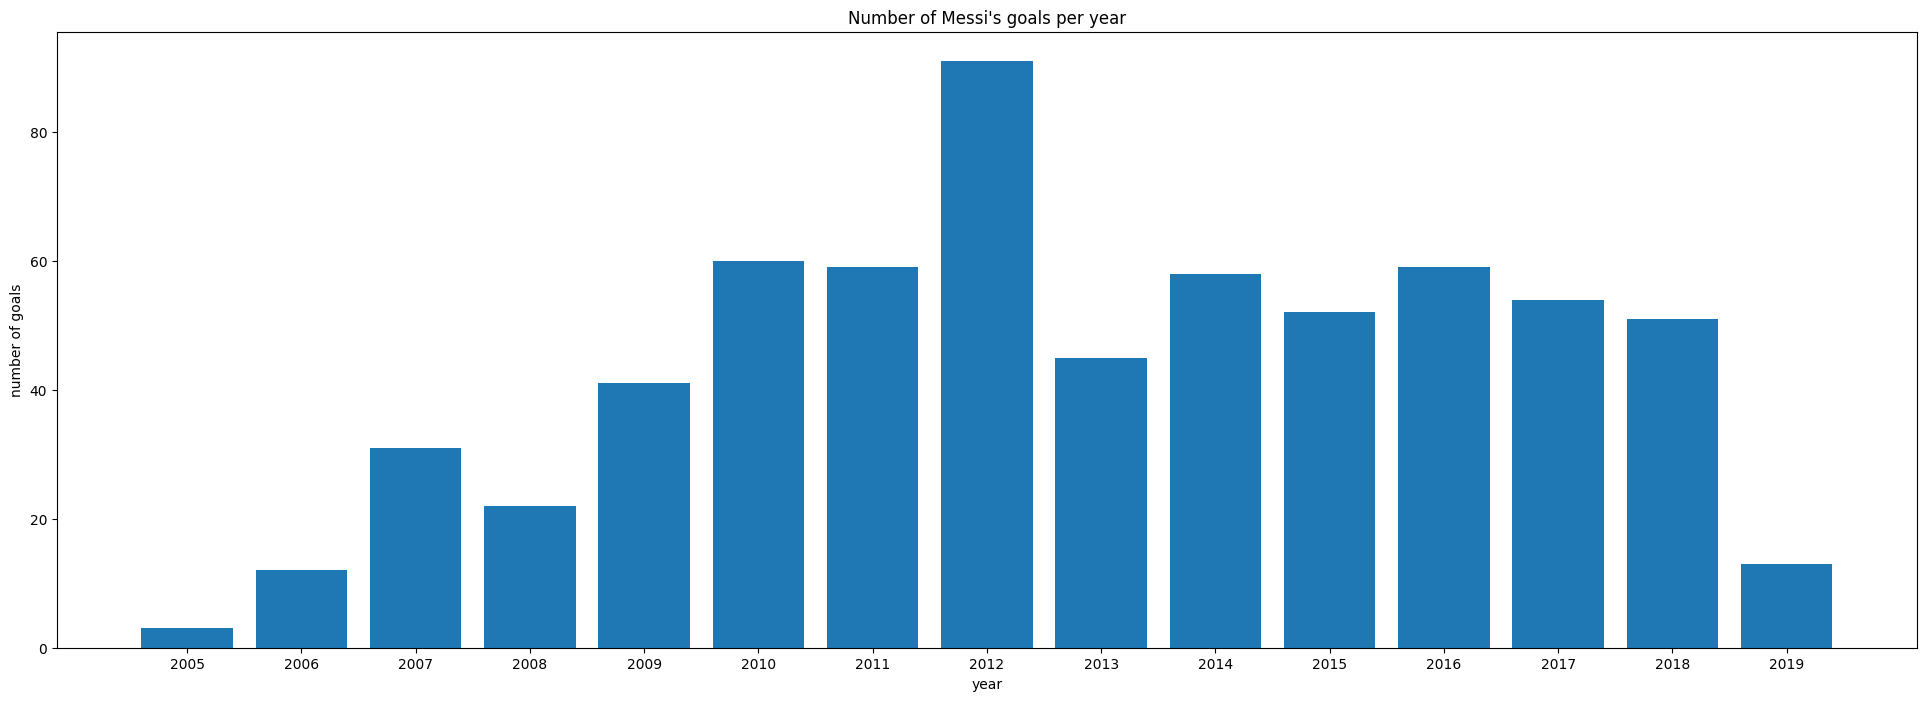

In [12]:
plt.figure(figsize=(24, 8))
plt.bar(df["Date"], df["count"])
plt.xlabel("year")
plt.ylabel("number of goals")
plt.title("Number of Messi's goals per year")
plt.show()

In [13]:
clean_data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)

df = clean_data.query("GoalType == 'Penalty'")['Goal Method'].value_counts().reset_index()
df.loc[1]=['Right foot',0]
df

,Goal Method,count
0,Left foot,82
1,Right foot,0


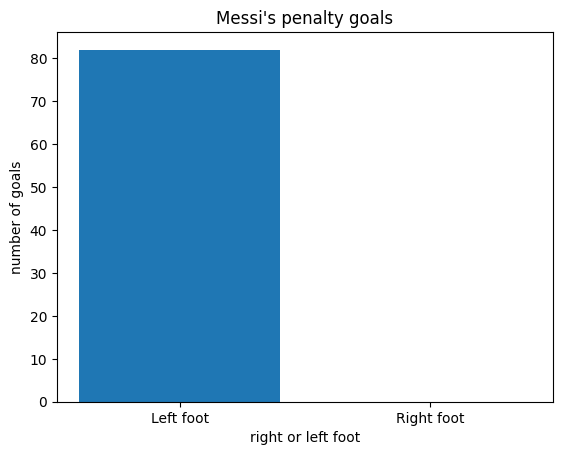

In [14]:
plt.bar(df["Goal Method"], df["count"])
plt.xlabel("right or left foot")
plt.ylabel("number of goals")
plt.title("Messi's penalty goals")
plt.show()

In [15]:
data.rename(columns = {'Final Game Result':'FinalGameResult'}, inplace = True)

df = data.query('Minute>90')['FinalGameResult'].value_counts().reset_index()
df

,FinalGameResult,count
0,Won,27
1,Lost,2
2,Draw,1


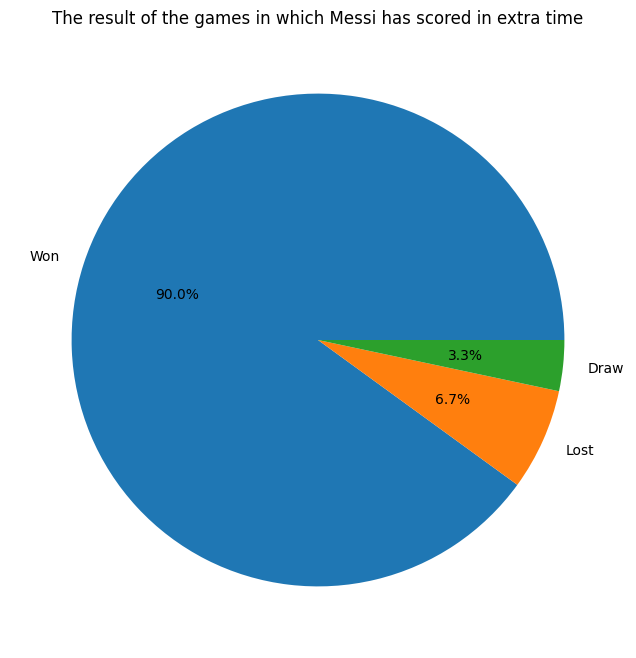

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(df["count"], labels=df["FinalGameResult"], autopct='%1.1f%%')
plt.title("The result of the games in which Messi has scored in extra time")
plt.show()

In [17]:
clean_data["Is Tie"] = clean_data["Score Home Team - When Messi Scored"] == clean_data["Score Away Team - When Messi Scored"]

tie_goals_df = clean_data[clean_data["Is Tie"] == True]

total_goals = len(clean_data)
tie_goals = len(tie_goals_df)

percentage_tie_goals = (tie_goals / total_goals) * 100

print(f"Percentage of Messi's tie goals: {percentage_tie_goals}")

Percentage of Messi's tie goals: 8.60215053763441
